In [2]:
#generating random dataseti
import numpy as np
import matplotlib.pyplot as plt

x=np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

x_b=np.c_[np.ones((100,1)),x]
#print(x_b)

In [3]:
#batch gradient descent
def batch_gradient_descent(x,y,learning_rate=0.1,n_iteration=1000):
    m=len(y)
    theta=np.random.randn(2,1)
    for iteration in range(n_iteration):
        gradients=2/m*x.T.dot(x.dot(theta)-y)
        theta=theta-learning_rate*gradients
    return theta

theta_bgd=batch_gradient_descent(x_b,y)
print("theta_bgd",theta_bgd)

theta_bgd [[3.95286908]
 [3.02360779]]


In [4]:
#stochastic gradient descent 

def stochastic_gradient_descent(x,y,learning_rate=0.1,n_epoch=50):
    m=len(y)
    theta=np.random.randn(2,1)
    for epoch in range(n_epoch):
        for i in range(m):
            random_index=np.random.randint(m)
            xi=x[random_index:random_index+1]
            yi=y[random_index:random_index+1]
            gradients=2*xi.T.dot(xi.dot(theta)-yi)
            theta=theta-learning_rate*gradients
    return theta
theta_sgd=stochastic_gradient_descent(x_b,y)
print("theta_sgd",theta_sgd)


theta_sgd [[3.94710724]
 [3.42872056]]


In [5]:
#mini batch gradient descent

def mini_batch_gradient_descent(x,y,n_iteration=50,learning_rate=0.1,batch_size=20):
    m=len(y)
    theta=np.random.randn(2,1)
    for iteration in range(n_iteration):
        shuffled_indicies=np.random.permutation(m)
        x_shuffled=x[shuffled_indicies]
        y_shuffled=y[shuffled_indicies]
        for i in range(0,m,batch_size):
            xi=x_shuffled[i:i+batch_size]
            yi=y_shuffled[i:i+batch_size]
            gradients=2/len(xi)*xi.T.dot(xi.dot(theta)-yi)
            theta=theta-learning_rate*gradients
    return theta

theta_mbgd=mini_batch_gradient_descent(x_b,y)
print("theta_mbgd",theta_mbgd)

theta_mbgd [[3.99398104]
 [3.00241828]]


In [6]:
def plot_gradient_descent(x,y,theta_bgd,theta_sgd,theta_mbdg):
    plt.plot(x,y,"b.")
    x_new=np.array([[0],[2]])
    x_new_b=np.c_[np.ones((2,1)),x_new]
    print(x_new)
    y_predict_bgd=x_new_b.dot(theta_bgd)
    y_predict_sgd=x_new_b.dot(theta_sgd)
    y_predict_mbgd=x_new_b.dot(theta_mbgd)
    plt.plot(x_new,y_predict_bgd,"r-",linewidth=4,label="bgd")
    plt.plot(x_new,y_predict_sgd,"g-",linewidth=2,label="sgd")
    plt.plot(x_new,y_predict_mbgd,"y-",linewidth=2,label="mbgd")
    plt.xlabel("$x_l$")
    plt.ylabel("$y$")
    plt.title("gd_comparison")
    plt.show()

[[0]
 [2]]


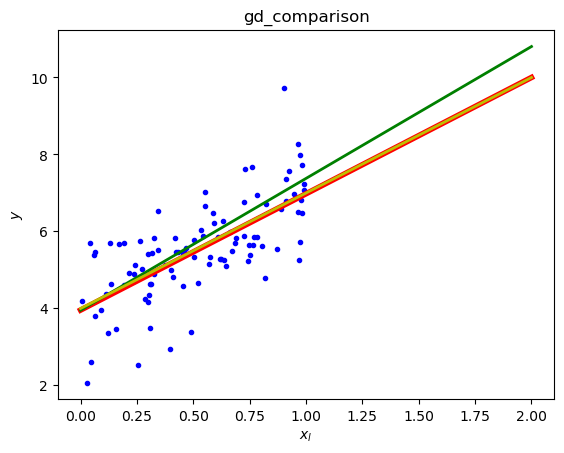

In [7]:
plot_gradient_descent(x,y,theta_bgd,theta_sgd,theta_mbgd)

In [8]:
#advanced optimizers 
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
x_b=np.c_[np.ones((100,1)),x]

def momentum_based_optimizer(x,y,learning_rate=0.1,iteration=100,momentum=0.9):
    m=len(y)
    theta=np.zeros((x.shape[1],1))
    velocity=np.zeros_like(theta)
    for iteration in range(iteration):
        gradients=1/m*x.T.dot(x.dot(theta)-y)
        velocity=momentum*velocity+learning_rate*gradients
        theta=theta-velocity
    return theta

momemtum=momentum_based_optimizer(x_b,y)
print("momentum:",momemtum)

momentum: [[3.91292692]
 [3.02960154]]


In [9]:
#adagard
def adagard(x,y,lr=0.1,epsilon=1e-8,iteration=1000):
    m=len(y)
    theta=np.random.randn(2,1)
    accum=np.zeros_like(theta)
    for i in range(iteration):
        gradients=2/m*x.T.dot(x.dot(theta)-y)
        accum+=gradients**2
        adjusted_gradient=gradients/(np.sqrt(accum)+epsilon)
        theta=theta-lr*adjusted_gradient
    return theta

adagard=adagard(x_b,y)
print("adagard",adagard)
    

adagard [[3.27554066]
 [3.47182666]]


In [10]:
#rms prop
def rms_prop(x,y,lr=0.1,gamma=0.9,epsilon=1e-8,iteration=1000):
    m=len(y)
    theta=np.random.randn(2,1)
    accum=np.zeros_like(theta)
    for i in range(iteration):
        gradients=2/m*x.T.dot(x.dot(theta)-y)
        accum=gamma*accum+(1-gamma)*gradients**2
        adjusted_gradients=gradients/(np.sqrt(accum)+epsilon)
        theta=theta-lr*adjusted_gradients
    return theta
rms=rms_prop(x_b,y)
print("rms",rms)
    

rms [[3.96166128]
 [3.06901188]]


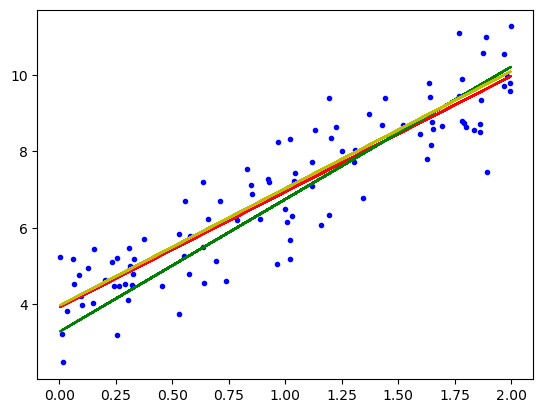

In [11]:
plt.plot(x,y,'b.')
plt.plot(x,x_b.dot(momemtum),'r-')
plt.plot(x,x_b.dot(adagard),'g-')
plt.plot(x,x_b.dot(rms),'y-')
plt.show()

In [ ]:
#gradient descent with momentum

def gradient_descent_with_momentum(X,y,theta,learning_rate,n_iteration,momentum):
  m=len(y)
  velocity=np.zeros_like(theta)

  for i in range(n_iteration):
    gradient=(1/m)*X.T.dot(X.dot(theta)-y)
    velocity=momentum*velocity-learning_rate*gradient
    theta=theta-velocity
  return theta

X=np.array([[1,2],[3,4],[5,6]])
y=np.array([1,2,3])
n_iteration=1000
momentum=0.9
learning_rate=0.01
theta=np.zeros(X.shape[1])

theta=gradient_descent_with_momentum(X,y,theta,learning_rate,n_iteration,momentum)
print("Optimized parameters:",theta)